In [1]:
import re
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import MeCab
import random
import codecs
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
import os

def story_name(file_name):
    path = "./"+file_name

    files = os.listdir(path)
    file_name_test = []

    for p in files:
        name = os.path.splitext(os.path.basename(p))[0]
        file_name_test.append(name)

    return file_name_test



In [3]:
import csv

def csv_read(csvfile_name,list_len):
    test_story ={}

    with open(csvfile_name) as f:
        reader = csv.reader(f)
        for row in reader:
            if row[list_len] == '':
                test_story[row[list_len-1]] = None
            else:
                test_story[row[list_len -1]] = row[list_len]
    return test_story

#csv_read("test12.csv",2)

In [4]:
def float_values(trips):

    for trip in trips:
        for key, value in trip.items():
            trip[key] = float(value)

    return trips

In [5]:
story_name_list = story_name("対象年齢あり童話")
story_name_list.sort()
target_age = csv_read("対象年齢.csv",1)
target_age.pop("story_name")
print(target_age)
print(len(target_age))

{'ももたろう': '4', 'ぶんぶくちゃがま': '4', 'かぜのかみとこども': '4', 'わらしべちょうじゃ': '4', 'びんぼう神とふくの神': '1', 'テングのすもう': '3', 'かぐや姫': '4', 'ききみみずきん': '3.5', 'さんねんねたろう': '4', 'たからゲタ': '4', 'タニシちょうじゃ': '3.5', 'いなばのしろウサギ': '4', 'はなさかじいさん': '4', 'なぞなぞおばけ': '7', 'まんじゅうこわい': '4.5', 'しちふくじん': '4', 'かしこいむすめ': '5', 'ねずみのすもう': '4', 'てんぷくちふく': '4', 'こぶとりじいさん': '3.5', 'あかたろう': '3', 'こそだてゆうれい': '3.5', 'ゆきおんな': '4', 'あまのはごろも': '4', 'いっすんぼうし': '4', 'しあわせのエンドウマメ': '5', 'おにはうち_ふくはそと': '4.5', 'お日さまとお月さま': '2.5', 'うしわかまる': '7', 'ねずみのよめいり': '4', 'かちかちやま': '4', 'うらしまたろう': '4', 'うりこひめ': '4', 'かさじぞう': '4', 'したきりすずめ': '4', 'せつぶんのオニ': '3', 'てんぐのかくれみの': '4', 'ちからたろう': '4', 'かさのえ': '3', 'いっきゅうさん': '4', 'きんたろう': '4', 'さるかにがっせん': '4', 'たつのこたろう': '8', 'つるのおんがえし': '4', 'おむすびころりん': '4', 'フクロウのそめものや': '2', 'ネズミきょう': '2', 'ふるやのもり': '4', 'サルじぞう': '4', 'しょうねんと子ダヌキ': '4', '三びきの子ブタ': '4', 'ジャックとまめの木': '3.5', 'しあわせの王子': '7', 'アラジンとまほうのランプ': '4', '三びきのクマ': '4', 'ハーメルンのふえふき男': '8.5', 'きたかぜのくれたテーブルかけ': '5.5', 'わがままなきょじん': '4', 'きんの糸と虹': '9', 'オオカミしょ

In [6]:
for k, v in target_age.items():
    target_age[k]= float(v)
print(target_age)

{'ももたろう': 4.0, 'ぶんぶくちゃがま': 4.0, 'かぜのかみとこども': 4.0, 'わらしべちょうじゃ': 4.0, 'びんぼう神とふくの神': 1.0, 'テングのすもう': 3.0, 'かぐや姫': 4.0, 'ききみみずきん': 3.5, 'さんねんねたろう': 4.0, 'たからゲタ': 4.0, 'タニシちょうじゃ': 3.5, 'いなばのしろウサギ': 4.0, 'はなさかじいさん': 4.0, 'なぞなぞおばけ': 7.0, 'まんじゅうこわい': 4.5, 'しちふくじん': 4.0, 'かしこいむすめ': 5.0, 'ねずみのすもう': 4.0, 'てんぷくちふく': 4.0, 'こぶとりじいさん': 3.5, 'あかたろう': 3.0, 'こそだてゆうれい': 3.5, 'ゆきおんな': 4.0, 'あまのはごろも': 4.0, 'いっすんぼうし': 4.0, 'しあわせのエンドウマメ': 5.0, 'おにはうち_ふくはそと': 4.5, 'お日さまとお月さま': 2.5, 'うしわかまる': 7.0, 'ねずみのよめいり': 4.0, 'かちかちやま': 4.0, 'うらしまたろう': 4.0, 'うりこひめ': 4.0, 'かさじぞう': 4.0, 'したきりすずめ': 4.0, 'せつぶんのオニ': 3.0, 'てんぐのかくれみの': 4.0, 'ちからたろう': 4.0, 'かさのえ': 3.0, 'いっきゅうさん': 4.0, 'きんたろう': 4.0, 'さるかにがっせん': 4.0, 'たつのこたろう': 8.0, 'つるのおんがえし': 4.0, 'おむすびころりん': 4.0, 'フクロウのそめものや': 2.0, 'ネズミきょう': 2.0, 'ふるやのもり': 4.0, 'サルじぞう': 4.0, 'しょうねんと子ダヌキ': 4.0, '三びきの子ブタ': 4.0, 'ジャックとまめの木': 3.5, 'しあわせの王子': 7.0, 'アラジンとまほうのランプ': 4.0, '三びきのクマ': 4.0, 'ハーメルンのふえふき男': 8.5, 'きたかぜのくれたテーブルかけ': 5.5, 'わがままなきょじん': 4.0, 'きんの糸と虹': 9.0, 'オオカミしょうねん': 5.5, 'アリとキリギリス

In [7]:

def story_make(story_n,file_name):
    story_test = {}
    for i in story_n:
        with open(file_name+"/"+ i + ".txt", 'r') as f:
            kw_list = f.read().split("\n")
            #print(kw_list)
        test_str ="".join(kw_list)
        story_test[i] = test_str
    return story_test

In [8]:
test_s = story_make(story_name_list,"童話")
print(story_name_list[0:3])
#print(test_s[story_name_list[0]])
print(len(test_s))

['あかいくつ', 'あかずきんちゃん', 'あかたろう']
92


In [9]:

def tf_idf(story_list):
    tagger = MeCab.Tagger('-Owakati')

    corpus = [tagger.parse(line).strip() for line in story_list.values()]
    vectorizer = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b')

    tf = vectorizer.fit_transform(corpus)
    tf_vec = vectorizer.fit_transform(corpus).toarray()

    features = vectorizer.get_feature_names()
    tfidf_transformer = TfidfTransformer(norm='l2', sublinear_tf=True)

    idf = tfidf_transformer.fit(tf_vec)

    tfidf = tfidf_transformer.fit_transform(tf_vec)

    return [tfidf, features]

In [10]:
tfidf_test = tf_idf(test_s)

In [11]:
df_test = pd.DataFrame( tfidf_test[0].toarray(),
                  index = test_s.keys(),
                  columns = tfidf_test[1]
)

df_test

,10,12,13,2,3,7,々,あ,あぁ,ああ,...,１,１つ,１月,２,２つ,３,４,５,６,７
あかいくつ,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.046010,0.029309,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
あかずきんちゃん,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
あかたろう,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.051330,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
あまのはごろも,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
いっきゅうさん,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.047228,0.000000,0.050487,...,0.041416,0.0,0.0,0.037864,0.0,0.0,0.0,0.0,0.043772,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ヘンゼルとグレーテル,0.0,0.0,0.0,0.0,0.000000,0.0,0.022912,0.000000,0.000000,0.034955,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
マッチうりの少女,0.0,0.0,0.0,0.0,0.000000,0.0,0.037438,0.000000,0.000000,0.033734,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
モミの木,0.0,0.0,0.0,0.0,0.000000,0.0,0.067388,0.000000,0.056297,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
三びきのクマ,0.0,0.0,0.0,0.0,0.070687,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [12]:
df_2_test = pd.DataFrame( target_age.values(),
                  index = target_age.keys(),
                  columns = ["対象年齢"]
)
df_2_test['対象年齢'] = df_2_test['対象年齢'].astype('int')
df_2_test

,対象年齢
ももたろう,4
ぶんぶくちゃがま,4
かぜのかみとこども,4
わらしべちょうじゃ,4
びんぼう神とふくの神,1
...,...
ねむり姫,4
くつやのこびと,4
カエルのおうさま,4
しっぽの釣り,3


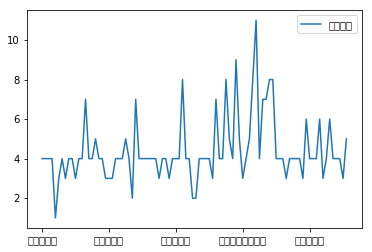

In [13]:
df_2_test.plot()

In [14]:
import os
import urllib.request

def download_stopwords(path):
    url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
    if os.path.exists(path):
        print('File already exists.')
    else:
        print('Downloading...')
        # Download the file from `url` and save it locally under `file_name`:
        urllib.request.urlretrieve(url, path)

def create_stopwords(file_path):
    stop_words = []
    for w in open(path, "r"):
        w = w.replace('\n','')
        if len(w) > 0:
          stop_words.append(w)
    return stop_words    

path = "stop_words.txt"
download_stopwords(path)
stop_words = create_stopwords(path)

File already exists.


In [15]:

tagger = MeCab.Tagger('-Owakati')
corpus2 = [tagger.parse(line).strip() for line in test_s.values()]
cv2 = CountVectorizer(min_df=0.20, max_df=0.80,stop_words=stop_words,token_pattern=u'(?u)\\b\\w+\\b')
matrix2 = cv2.fit_transform(corpus2)

print(cv2.get_feature_names())
print(type(cv2.get_feature_names()))
print(len(cv2.get_feature_names()))

print(matrix2.toarray())
print(len(matrix2.toarray()))

['あげ', 'あっ', 'あの', 'あり', 'ありがとう', 'いい', 'いう', 'いき', 'いく', 'いっ', 'いつも', 'お', 'おじいさん', 'おばあさん', 'おり', 'お前', 'お母さん', 'お金', 'かい', 'かけ', 'きれい', 'くる', 'くれ', 'こ', 'こう', 'この', 'こんな', 'さ', 'しばらく', 'しまい', 'しまっ', 'じゃ', 'すぐ', 'する', 'すると', 'ず', 'せ', 'そこで', 'そして', 'それから', 'そんな', 'ぞ', 'たい', 'たら', 'だけ', 'だっ', 'だろ', 'でき', 'でし', 'でしょ', 'でも', 'という', 'とうとう', 'とても', 'どう', 'なかっ', 'ながら', 'なく', 'なさい', 'なっ', 'なら', 'なり', 'なる', 'ね', 'ので', 'ば', 'へ', 'ましょ', 'ます', 'また', 'まで', 'み', 'みる', 'むかし', 'もう', 'や', 'やがて', 'やっ', 'やってき', 'やる', 'よ', 'よく', 'られ', 'れ', 'わ', 'ー', '一緒', '住ん', '僕', '入っ', '入れ', '出', '出かけ', '出し', '喜び', '声', '夜', '大', '大きな', '始め', '姿', '子供', '小さな', '山', '帰っ', '帰り', '幸せ', '心', '思い', '思っ', '持っ', '昔', '晩', '暮らし', '朝', '来', '歩い', '美しい', '聞い', '落ち', '行き', '行く', '行っ', '見え', '見つけ', '言い', '言う', '言っ', '言わ', '連れ', '音', '顔', '食べ']
<class 'list'>
133
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 2]
 [0 1 0 ... 0 0 2]
 ...
 [1 0 1 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 6]]
92


In [16]:
tf_vec_cv = cv2.fit_transform(corpus2).toarray()
features_cv = cv2.get_feature_names()
tfidf_transformer_cv = TfidfTransformer(norm='l2', sublinear_tf=True)
idf_cv = tfidf_transformer_cv.fit(tf_vec_cv)
tfidf_cv = tfidf_transformer_cv.fit_transform(tf_vec_cv)
print("tfidf:\n{}".format(tfidf_cv.toarray()))
print(type(tfidf_cv.toarray()))
print(type(tfidf_cv))

tfidf:
[[0.         0.         0.07893619 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.21892317]
 [0.         0.09403781 0.         ... 0.         0.         0.13171393]
 ...
 [0.10004561 0.         0.07271019 ... 0.09628689 0.         0.        ]
 [0.         0.15109682 0.         ... 0.14542011 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.30703527]]
<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>


In [44]:
df_t = pd.DataFrame( tfidf_cv.toarray(),
                  index = test_s.keys(),
                  columns = features_cv
                   )

#df_t

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = df_test
Y = df_2_test
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.3, random_state=0)

In [19]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() # 線形重回帰
regressor.fit(x_train, y_train) # 学習

# Make predictions using the testing set
predicted = regressor.predict(x_test)

# Check the predictions vs true answer
print(np.c_[predicted, y_test])

[[4.01126353 4.        ]
 [4.47289882 4.        ]
 [4.3394485  4.        ]
 [4.21705984 5.        ]
 [4.19291731 7.        ]
 [4.4088426  4.        ]
 [4.20738195 3.        ]
 [4.06469491 4.        ]
 [4.58933802 4.        ]
 [4.00457075 8.        ]
 [4.15797691 2.        ]
 [4.25869335 3.        ]
 [4.36288714 4.        ]
 [3.74274969 6.        ]
 [4.42558336 8.        ]
 [4.29599231 8.        ]
 [3.81360941 4.        ]
 [4.05771048 4.        ]
 [4.2140498  3.        ]
 [4.17023685 4.        ]
 [4.05499885 4.        ]
 [4.29435061 4.        ]
 [4.19807629 4.        ]
 [3.93706172 4.        ]
 [4.31852148 4.        ]
 [4.0314104  4.        ]
 [4.10762479 5.        ]
 [4.07729506 4.        ]]


In [20]:
x_list = df_test.values
y_list = df_2_test.values

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = x_list
Y = y_list
Y=np.reshape(Y,(-1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2019)

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


In [23]:
Y=np.reshape(Y,(-1))
Y.ndim

1

In [24]:
Y

array([ 4,  4,  4,  4,  1,  3,  4,  3,  4,  4,  3,  4,  4,  7,  4,  4,  5,
        4,  4,  3,  3,  3,  4,  4,  4,  5,  4,  2,  7,  4,  4,  4,  4,  4,
        4,  3,  4,  4,  3,  4,  4,  4,  8,  4,  4,  2,  2,  4,  4,  4,  4,
        3,  7,  4,  4,  8,  5,  4,  9,  5,  3,  4,  5,  8, 11,  4,  7,  7,
        8,  8,  4,  4,  4,  3,  4,  4,  4,  4,  3,  6,  4,  4,  4,  6,  3,
        4,  6,  4,  4,  4,  3,  5])

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import pprint

svr = SVR(kernel='rbf', C=1, epsilon=0.9, gamma='auto')
kf = KFold(n_splits=5,shuffle=True,random_state=1)

pprint.pprint(cross_validate(svr,X,Y,scoring="r2",cv=kf))

{'fit_time': array([0.01304388, 0.00640988, 0.00998688, 0.01036501, 0.01139307]),
 'score_time': array([0.00497723, 0.00308609, 0.00451612, 0.01636887, 0.002985  ]),
 'test_score': array([-0.50637495, -0.13970078, -0.04612073, -0.38528696, -0.05491915])}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import pprint

svr = SVR(kernel = "rbf",gamma = 1)
#kf = KFold(n_splits=5,shuffle=True,random_state=1)

svr.fit(X_train, Y_train)

predicted_svr = svr.predict(x_test)
print(np.c_[predicted_svr, y_test])

[[4.10012223 4.        ]
 [4.10016654 4.        ]
 [4.10048136 4.        ]
 [4.90010783 5.        ]
 [4.18369572 7.        ]
 [4.09957447 4.        ]
 [4.19954029 3.        ]
 [4.09954195 4.        ]
 [4.10009933 4.        ]
 [4.16767504 8.        ]
 [4.18388704 2.        ]
 [3.36392257 3.        ]
 [4.10002382 4.        ]
 [4.16287603 6.        ]
 [4.17873013 8.        ]
 [5.01636056 8.        ]
 [4.10041583 4.        ]
 [4.10016284 4.        ]
 [3.4169962  3.        ]
 [4.10017382 4.        ]
 [4.15104264 4.        ]
 [4.09999787 4.        ]
 [4.09972063 4.        ]
 [4.17603478 4.        ]
 [4.20215971 4.        ]
 [4.10010997 4.        ]
 [4.90010257 5.        ]
 [4.09971397 4.        ]]


In [28]:
svr.score(X_train, Y_train), svr.score(X_test, Y_test)

(0.48309097792373445, -0.014193998660791962)

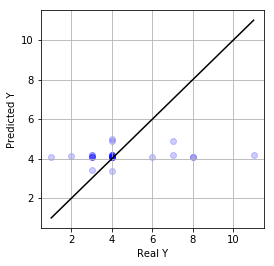

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
y_pred = svr.predict(x_test)
plt.figure(figsize=(4,4))
plt.scatter(Y_test, y_pred, alpha=0.2, c="blue")
#plt.scatter(Y_train, y_pred, alpha=0.2, c="red")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], c="black")
#plt.plot(svr.support_, c="red")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

In [30]:
reg_linear = SVR(kernel='linear', C=1, epsilon=0.1, gamma='auto')
reg_poly = SVR(kernel='poly', C=1, epsilon=0.1, gamma='auto')
reg_rbf = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='auto')

reg_linear.fit(X_train, np.ravel(Y_train))
reg_poly.fit(X_train, np.ravel(Y_train))
reg_rbf.fit(X_train, np.ravel(Y_train))

SVR(C=1, gamma='auto')

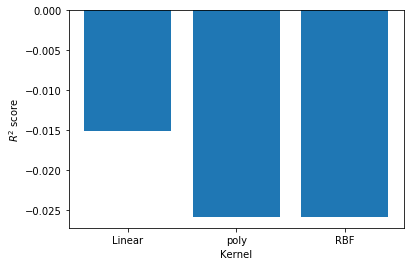

In [31]:
scores = (reg_linear.score(X_test, Y_test),
reg_poly.score(X_test, Y_test),
reg_rbf.score(X_test, Y_test))

plt.bar(("Linear", "poly", "RBF"), scores)
plt.xlabel("Kernel")
plt.ylabel("$R^2$ score")
plt.show()

In [32]:
reg_poly = SVR(kernel='poly', C=1, epsilon=0.1, gamma='auto', degree=0, coef0=1)
reg_poly.fit(X_train, np.ravel(Y_train))

SVR(C=1, coef0=1, degree=0, gamma='auto', kernel='poly')

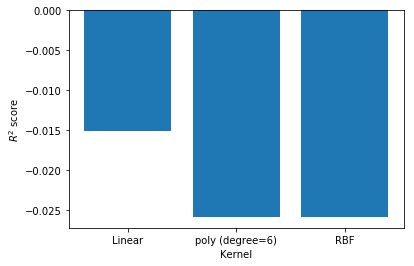

In [33]:
scores = (reg_linear.score(X_test, Y_test),
reg_poly.score(X_test, Y_test),
reg_rbf.score(X_test, Y_test))

plt.bar(("Linear", "poly (degree=6)", "RBF"), scores)
plt.xlabel("Kernel")
plt.ylabel("$R^2$ score")
plt.show()

In [45]:
model1 = SVR(kernel='rbf', C=1, epsilon=0.0,gamma='auto').fit(X_train, np.ravel(Y_train))
model2 = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))
model3 = SVR(kernel='rbf', C=1, epsilon=0.9, gamma='auto').fit(X_train, np.ravel(Y_train))

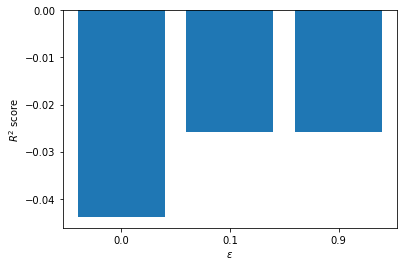

(-0.043983226019378874, -0.02584788987773412, -0.02588781765625292)


In [47]:
scores = (model1.score(X_test, Y_test), model2.score(X_test, Y_test), model3.score(X_test, Y_test))

plt.bar(("0.0", "0.1", "0.9"), scores)
plt.xlabel("$\\varepsilon$")
plt.ylabel("$R^2$ score")
plt.show()
print(scores)

In [50]:
model4 = SVR(kernel='rbf', C=0.01, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))
model5 = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))
model6 = SVR(kernel='rbf', C=1000, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))

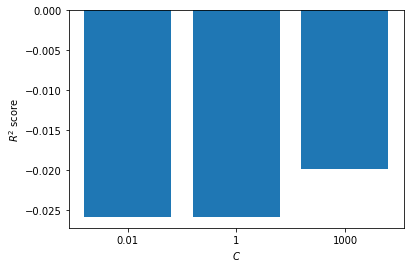

In [51]:
scores = (model4.score(X_test, Y_test), model5.score(X_test, Y_test), model6.score(X_test, Y_test))

plt.bar(("0.01", "1", "1000"), scores)
plt.xlabel("$C$")
plt.ylabel("$R^2$ score")
plt.show()

In [38]:
model7 = SVR(kernel='rbf', C=1000, epsilon=0.9, gamma='auto').fit(X_train, np.ravel(Y_train))

In [48]:
linear_model1 = SVR(kernel='linear', C=1, epsilon=0.0,gamma='auto').fit(X_train, np.ravel(Y_train))
linear_model2 = SVR(kernel='linear', C=1, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))
linear_model3 = SVR(kernel='linear', C=1, epsilon=0.9, gamma='auto').fit(X_train, np.ravel(Y_train))

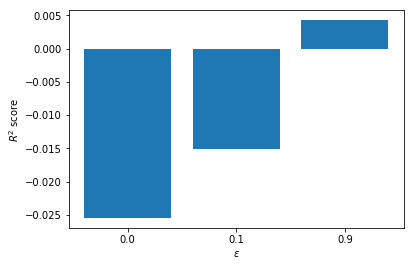

(-0.025461608265235913, -0.015131007550685194, 0.004281157635415922)


In [49]:
scores = (linear_model1.score(X_test, Y_test), linear_model2.score(X_test, Y_test), linear_model3.score(X_test, Y_test))

plt.bar(("0.0", "0.1", "0.9"), scores)
plt.xlabel("$\\varepsilon$")
plt.ylabel("$R^2$ score")
plt.show()
print(scores)

In [41]:
linear_model4 = SVR(kernel='linear', C=0.01, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))
linear_model5 = SVR(kernel='linear', C=1, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))
linear_model6 = SVR(kernel='linear', C=1000, epsilon=0.1, gamma='auto').fit(X_train, np.ravel(Y_train))
linear_model7 = SVR(kernel='linear', C=1000, epsilon=0.9, gamma='auto').fit(X_train, np.ravel(Y_train))

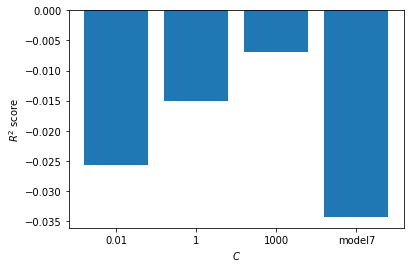

In [42]:
scores = (linear_model4.score(X_test, Y_test), linear_model5.score(X_test, Y_test), linear_model6.score(X_test, Y_test),linear_model7.score(X_test, Y_test))

plt.bar(("0.01", "1", "1000","model7"), scores)
plt.xlabel("$C$")
plt.ylabel("$R^2$ score")
plt.show()

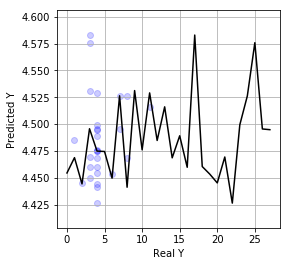

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
lineary_pred = linear_model3.predict(X_test)
plt.figure(figsize=(4,4))
plt.scatter(Y_test, lineary_pred, alpha=0.2, c="blue")
#plt.plot(Y_test, c="red")
plt.plot(lineary_pred, c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()